# 1. Important Libraries & Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit

# 2. Train Model(s)

## 2.2 Using All Features

In [3]:
# Using all features
train_with20 = pd.read_csv("../DataSet/with20_train.csv") # get trainig data
valid_with20 = pd.read_csv("../DataSet/with20_valid.csv") # get validation data

X_with20_train, y_with20_train = train_with20.iloc[:,:-1],train_with20.iloc[:,-1] # split the y from other columns
X_with20_valid, y_with20_valid = valid_with20.iloc[:,:-1],valid_with20.iloc[:,-1]

print(f"The shape for X_train is {X_with20_train.shape} and shape for X_test is {X_with20_valid.shape}.")

The shape for X_train is (835648, 57) and shape for X_test is (92868, 57).


In [5]:
clf = MLPClassifier()
clf.fit(X_with20_train, y_with20_train)

MLPClassifier()

In [6]:
print(f'Train Accuracy = {clf.score(X_with20_train, y_with20_train)}')
print(f'Test Accuracy = {clf.score(X_with20_valid, y_with20_valid)}')

Train Accuracy = 0.9987973405070077
Test Accuracy = 0.48322350002153597


## 2.2 Using Four Categories

In [7]:
# Using all features
train_with4 = pd.read_csv("../DataSet/with4_train.csv") # get trainig data
valid_with4 = pd.read_csv("../DataSet/with4_valid.csv") # get validation data

X_with4_train, y_with4_train = train_with4.iloc[:,:-1],train_with4.iloc[:,-1] # split the y from other columns
X_with4_valid, y_with4_valid = valid_with4.iloc[:,:-1],valid_with4.iloc[:,-1]

print(f"The shape for X_train is {X_with4_train.shape} and shape for X_test is {X_with4_valid.shape}.")

The shape for X_train is (835648, 34) and shape for X_test is (92868, 34).


In [8]:
clf2 = MLPClassifier()
clf2.fit(X_with4_train, y_with4_train)
print(f'Train Accuracy = {clf2.score(X_with4_train, y_with4_train)}')
print(f'Test Accuracy = {clf2.score(X_with4_valid, y_with4_valid)}')

Summary for model 2 is given below. The function credit to https://www.kaggle.com/code/jonathankristanto/mnist-classification-using-multilayer-perceptron?scriptVersionId=80662744&cellId=22

In [ ]:
print("Weights\n", clf2.coefs_)
print("Number of layer : ", clf2.n_layers_)
print("Number of output : ", clf2.n_outputs_)

Weights
 [array([[ 1.91919607e-003, -4.42542353e-002, -3.82181029e-315,
        -8.41570348e-002,  3.49304411e-315,  4.19816280e-316,
         2.75678054e-001,  3.87121859e-003,  1.49551538e-001,
        -1.74239648e-315,  3.76456191e-003,  2.73789309e-315,
         2.09673524e-001,  1.83014694e-091, -4.25473073e-315,
         2.25051142e-001,  3.29582973e-001,  3.32431849e-001,
        -6.11862175e-316, -6.98464986e-002,  1.81601942e-098,
        -2.77560410e-072,  3.18935601e-001,  1.39888972e-001,
         8.68802087e-003, -8.99315528e-025, -4.04808778e-007,
         4.99183409e-083,  1.32190423e-093,  3.54292308e-001,
         3.29650474e-001,  2.24423906e-001,  1.21462091e-001,
         3.83795687e-002, -3.12187557e-316, -1.13068881e-315,
        -2.16555558e-316, -1.61002535e-315, -2.31997096e-315,
        -2.73086655e-315,  2.39046917e-001, -1.17558743e-315,
         1.75707241e-001,  1.68803307e-315, -4.05358888e-315,
        -6.09853290e-316, -1.24312251e-079,  1.90663127e-001

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

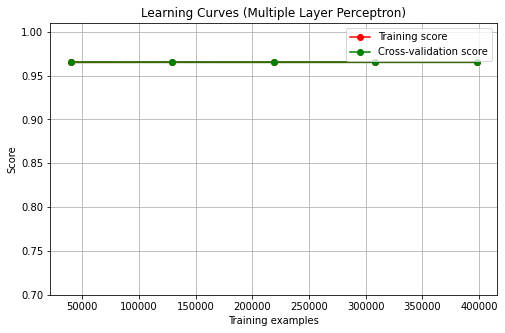

In [ ]:
title = "Learning Curves (Multiple Layer Perceptron)"

# Cross validation with 5 iterations each time with 20% data 
# randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = MLPClassifier()
plot_learning_curve(estimator, title, train_with4.iloc[:,:-1], train_with4.iloc[:,-1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()